# Refinery Optimization Exercise


## Problem description
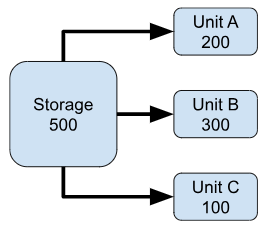



The figure above shows a simplified schema of a refinery with three units (a, b, and c). Each unit consumes crude oil from the same storage (S).
The different units and storage have the following characteristics

### Storage:
- Capacity (Cs): 500 barrels
- Initial volume (Vs): 300 barrels

### Units:
- Unit A capacity (Ca): 200 barrels
- Unit B capacity (Cb): 300 barrels
- Unit C capacity (Cc): 100 barrels

The volumes of crude oil consumed by units are:
- $V_a$: Volume consumed by Unit A
- $V_b$: Volume consumed by Unit B
- $V_c$: Volume consumed by Unit C

Your goal is to model the allocation of crude oil from storage to the processing units to ensure constraints are satisfied and optimize certain objectives.

First, let's define problem decision variables.

---

In [1]:
# install pulp if needed
%pip install pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 14.6 MB/s eta 0:00:00


In [25]:
# Define decision variables
# We can use an optimization library like PuLP
from pulp import LpProblem, LpVariable, LpMinimize, LpStatusOptimal, LpStatus, LpConstraint, LpAffineExpression

# Create a problem instance
problem = LpProblem("Refinery_Optimization", LpMinimize)

# Define decision variables
V_a = LpVariable("V_a", 0, 200)  # Volume for Unit A
V_b = LpVariable("V_b", 0, 300)  # Volume for Unit B
V_c = LpVariable("V_c", 0, 100)  # Volume for Unit C
V_l = LpVariable("V_l", 0, 1, cat='Binary')  # Volume for Unit S
V_S = LpVariable("V_S", 0, 300)  # Volume for Unit S

## Exercise Questions

### Step 1: Write constraints modeling the crude oil flow from Storage (S) to the different units

In [26]:
# Constraints can be added to the problem using natural syntax: problem += x + y <= 1, "{cstr_name}"

problem += V_a + V_b + V_c == 300 , "Total_Consumption_Limit"

Refinery units (a,b and c) operate with a certain cost. For each barrel of crude oil processed, each unit incurs a cost ($c_a$, $b_c$ and $c_c$). Let's consider following operating costs:
- $c_a$ = 3
- $c_b$ = 4
- $c_c$=1

In [19]:
c_a, c_b, c_c = (3, 4, 1)

### Step 2: Define an objective function minimizing total operation cost of all units?

In [27]:
# Define the objective function (fill the missing part)
problem += (c_a*V_a) + (c_b*V_b)+ (c_c*V_c), "Total_Cost"

Let's now solve the problem. Can you guess what would be the optimal solution?

Use the solve function to solve the LP and confirm wether the solution is coherent.

In [21]:
def solve(problem: LpProblem) -> LpStatus:
    problem.solve()
    status = LpStatus[problem.status]
    if problem.status != LpStatusOptimal:
        print("Problem is infeasible")
        return LpStatus[problem.status]
    print(f"Problem solver. Optimal value = {problem.objective.value()}")
    for var in problem.variables():
        print(f"{var.name} = {var.varValue}")
    return LpStatus[problem.status]

solve(problem)

Problem solver. Optimal value = 700.0
V_a = 200.0
V_b = 0.0
V_c = 100.0


'Optimal'

### Step 3: Priority constraint
In the reality, we have some operational constraints resulting in a priority order between units c and b. Basically, we cannot use unit c if unit b is not fully used.

- Write a constraint modelling the priotiy constraint between unit b and unit c.
- Solve the problem and analyse results

In [28]:
# Add as many constraints/variables as you need
problem +=  300 - V_b <= V_l * 300
problem +=  V_c <= (1-V_l) * 100

# problem += ..., "Priority constraints"
solve(problem)

Problem solver. Optimal value = 1000.0
V_a = 200.0
V_b = 100.0
V_c = 0.0
V_l = 1.0


'Optimal'

In the real world, refieneries operate on a 1-week schedule. Each unit has a daily processing capacity:
- Unit A: 20 barrels/day
- Unit B: 30 barrels/day
- Unit C: 20 barrels/day

The refinery needs to process all volume in storage unit within a week.

Before going any futhure, let's define a function that builds and solves a model given a set of constraints and an objective function.

In [ ]:
def solve_problem(problem_name: str, constraints: list[LpConstraint], objective_function: LpAffineExpression) -> LpStatus:
    problem = LpProblem(problem_name, LpMinimize)

    for cstr in constraints:
        problem += cstr
    problem += objective_function
    problem.solve()
    status = LpStatus[problem.status]
    if problem.status != LpStatusOptimal:
        print("Problem is infeasible")
    else:
        print(f"Problem solver. Optimal value = {problem.objective.value()}")
    return LpStatus[problem.status]

def display_results(V_a: list[LpVariable], V_b: list[LpVariable], V_c: list[LpVariable], V_s: list[LpVariable]):
    for t in range(T):
        print(f"Day {t + 1}:")
        print("  V_a:", V_a[t].varValue)
        print("  V_b:", V_b[t].varValue)
        print("  V_c:", V_c[t].varValue)
        print("  V_s:", V_s[t].varValue)


### Step 4:
instructions:
- extend the model to include daily time steps
- ensure appropriate storage volume daily-evolution
- ensure daily processing capacities are not exceeded
- ensure that volume storage $V_s$ starts at initial value and is entirely consummed at the end of time horizon T
- formulate objective function representing total operational cost over the tme horizon

Costs of operating units are considered constant on the whole time horizon.

In [ ]:
# Extend model for time dimension
T = 7  # Days horizon
# Redefine variables
V_a_t = [... for t in range(T)]
V_b_t = [... for t in range(T)]
V_c_t = [... for t in range(T)]
V_s_t = [... for t in range(T)]

# initialize constraints list
constraints = []
# add storage evolution constraints
for t in range(T):
    if t < T-1:
        constraints.append(V_s[t+1] == V_s[t] + ...)

# storage volume initial value
constraints.append(...)
# storage volume end value
constraints.append(...)

# define objective function
total_operational_cost = sum(... for t in range(T))

### **Step 5: Run Optimization and Explore Solutions**
#### Instructions:
- Solve the extended problem.
- Display the optimal solution over the time horizon.

In [ ]:
solve_problem("refinery_optimization", constraints=constraints, objective_function=total_operational_cost)
display_results(V_a, V_b, V_c, V_s)

### **Step 5: Add priority Constraints**
#### Instructions:
- Add constraints ensuring that unit c is only used after unit a runs at full capabity.
- Use binary variables defined below 'MAX_CAPA_a'

In [ ]:
MAX_CAPA_a = [LpVariable(f"MAX_CAPA_a_{t}", 0, 1, cat='Binary') for t in range(T)]

# add priority evolution
for t in range(T):
    constraints.append(...)
    constraints.append(...)

- Solve and display the results.

In [ ]:
solve_problem("refinery_optimization", constraints=constraints, objective_function=total_operational_cost)
display_results(V_a, V_b, V_c, V_s)

### **Step 6: Add Outage Constraints**
#### Instructions:
- Introduce necessary outages for maintenance.
  - Each unit must proceed in an outage at least one time per 7 days
  - outage lasts 1 day
  
We defined turn-on status binary variables 'Y_a, Y_b, Yc' to be used to enforce outages.

In [ ]:
# Define binary variables for turn-on status
Y_a = [LpVariable(f"Y_a_{t}", 0, 1, cat="Binary") for t in range(T)]
Y_b = [LpVariable(f"Y_b_{t}", 0, 1, cat="Binary") for t in range(T)]
Y_c = [LpVariable(f"Y_c_{t}", 0, 1, cat="Binary") for t in range(T)]

# Link turn-on status to volumes processed
for t in range(T):
    constraints.append(...)
    constraints.append(...)
    constraints.append(...)

# ensure 1-day outage per week
constraints.append(...)
constraints.append(...)
constraints.append(...)

- solve and display results

In [ ]:
solve_problem("refinery_optimization", constraints=constraints, objective_function=total_operational_cost)
display_results(V_a, V_b, V_c, V_s)

### Step 7: furthure extend the model with refined products
In the reality, processing units a,b and c will produce refined products: $product_1, product_2$. Each barrel of a refined product can be sold at a correspondin price: $p_1$ and $p_2$. Furthuremore, each unit converts crude oil to refined products with a specific ratios $r_{unit, product}$. Per example, unit a, after processing $x$ barrels of crude oil will generate $r_{a,1}x$, $r_{a,2}x$ barrels of refined products. We assume that crude ol and refined products have the same density, thus $r_{a,1} + r_{a,2} = 1$.

Convertion ratios are define for each unit:
- unit a: [$r_{a,1}, r_{a,2}$] = [0.7, 0.3]
- unit a: [$r_{b,1}, r_{b,2}$] = [0.6, 0.4]
- unit a: [$r_{c,1}, r_{c,2}$] = [0.8, 0.2]

a barrel of $product_1$ generates a revenue of $p_1=4$ and $p_2=7$.

instructions:
- Extend the model to include refined products
- Include refined products revenue in the objective function

In [ ]:
# Define binary variables for starting each unit
r = {"a": [0.7, 0.3],
    "b": [0.6, 0.4],
    "c": [0.8, 0.2]}
p_1, p_2 = 4, 7

# Define refined products variables
V_product_1 = [... for t in range(T)]
V_product_2 = [... for t in range(T)]

# Add refined products production cstr (from crude oil)
for t in range(T):
    # product_1
    constraints.append(...)
    # product_2
    constraints.append(...)

# Add refined products revenue to the objective function
total_operational_cost = sum(... for t in range(T))
refined_products_revenue = sum(... for t in range(T))
objective_function = total_operational_cost + refined_products_revenue

- solve problem and display results

In [ ]:
solve_problem("refinery_optimization", constraints=constraints, objective_function=total_operational_cost)
display_results(V_a, V_b, V_c, V_s)